In [1]:
"""
importing the necessary libraries, do not modify
"""
%matplotlib inline 
from IPython.display import display,Image, Latex

from IPython.display import clear_output



import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.constants as sc

import sympy as sym




# Jupyter notebooks to solve heat transfer problems

## Module schemdraw
In order to use jupyter notebooks for your assignments you first need to install a module to draw resistance circuits.

### Windows

Search and launch anaconda prompt

### Mac OS

In `Applications`>`Utilities` open Terminal

### Command

In the prompt or terminal execute:

`python -m pip install schemdraw`

## Inserting sketches/photos

The very step for solving any engineering problem is to draw a sketch. The notebook is an awesome tool but it does not allow for drawing yet. Using your favorite app to sketch or simply taking a picture or scan of your hand-drawn sketch, use the following command to insert your image in a `markdown` cell:

`<img src="image.jpg" alt="my awesome sketch" width="500" height="600">`

or 

`<img src="image.jpg" alt="my awesome sketch" width=100% >`

If you only enter one attribute (width or height), the browser should preserve the width:height ratio.

In [2]:

import schemdraw as schem
import schemdraw.elements as e

# Thermodynamics Module

The thermodynamic properties necessary for the treatment of heat transfer problem include:
* Density $\rho \text{ (kg/m$^3$)}$
* Specific heat at constant pressure $C_p \text{ (J/(kg.K)}$
* Dynamic viscosity $\mu \text{ (kg/(m.s))}$
* Thermal conductivity $k \text{ (W/(m.K))}$
* Kinematic viscosity $\nu \text{ (m$^2$/s)}$
* Thermal diffusivity $\alpha \text{ (m$^2$/s)}$
* Prandtl number $Pr$, ratio of kinematic viscosity to thermal diffusivity, dimensionless
* Thermal expansion coefficient $\beta \text{ (1/K)}$


The module <FONT FACE="courier" style="color:blue">from Libraries import thermodynamics as thermo </FONT> gives these thermodynamics properties for water, air, argon and krypton under <FONT style="color:red">$1\text{ atm}$</FONT> over a given range of temperature $T$ (dependent upon the fluid). Air properties are tabled between $-150\text{$^\circ$C}$ and $400\text{$^\circ$C}$, water between $274\text{K}$ and $373\text{K}$, Argon between $100\text{K}$ and $700\text{K}$ and Krypton between $150\text{K}$ and $750\text{K}$
<p class='alert alert-danger'>
    <b>When using the library thermodynamics, the input temperature must be in Kelvin</b>
</p>
Use the library's functions <FONT FACE="courier" style="color:blue">C2K, K2C, K2F </FONT> and <FONT FACE="courier" style="color:blue">F2K </FONT> to convert temperatures to Kelvin, Celsius or Fahrenheit. Thermodynamic properties are linearly interpolated from the two nearest temperature states.

## How does it work?

First load up the module

In [3]:
from Libraries import thermodynamics as thermo

Second define a variable as your fluid. For example:

In [4]:
water_pipe = thermo.Fluid('water',thermo.F2K(70.))

The class is called Fluid, the capital letter F is necessary. If you don't remember which fluids are available, execute the following:

In [5]:
? thermo.Fluid

Now you can print any of the quantities defined above:

In [6]:
print('Density %4.3f kg/m^3' %water_pipe.rho)
print('Specific heat %4.3f J/Kg.K' %water_pipe.Cp)
print('Dynamic viscosity %1.3e kg/m.s' %water_pipe.mu)
print('Thermal conductivity %4.4f W/m.K' %water_pipe.k)
print('Kinematic viscosity %1.3e m^2/s' %water_pipe.nu)
print('Thermal diffusivity %1.3e m^2/s' %water_pipe.alpha)
print('Prandtl number %4.3f ' %water_pipe.Pr)
print('Thermal expansion coefficient %1.3e 1/K' %water_pipe.beta)

Density 997.973 kg/m^3
Specific heat 4183.343 J/Kg.K
Dynamic viscosity 9.750e-04 kg/m.s
Thermal conductivity 0.6004 W/m.K
Kinematic viscosity 9.770e-07 m^2/s
Thermal diffusivity 1.438e-07 m^2/s
Prandtl number 6.793 
Thermal expansion coefficient 2.181e-04 1/K


## Thermal Resistance Module

The class thermal resistance is imported with <FONT FACE="courier" style="color:blue">from Libraries import HT_thermal_resistance as res</FONT>.

Thermal resistances are derived from an analogy between heat transfer and electric circuit. Each mode of heat transfer can be represented by a thermal resistance, linking the heat flux ($q''\text{ W/m$^2$}$), heat rate per unit length ($q'\text{ W/m}$) or heat rate ($q\text{ W}$) to the temperature difference between two points ($T_a-T_b$, with $T_a>T_b$:
<p class='alert alert-danger'>
$$
q''=\frac{1}{R''_\text{th}}\left(T_a-T_b\right),\; q'=\frac{1}{R'_\text{th}}\left(T_a-T_b\right),\; q=\frac{1}{R_\text{th}}\left(T_a-T_b\right)
$$
</p>
The heat transfer rate, also called heat loss or heat gain, is analog to the current, and the temperature to the potential difference. 

The first step is to define an array of thermal resistance, and give each resistance its own label.

Here we use the class Resistance in the module HT_thermal_resistance. The first call requires the label (in Latex format with \$ $\) and the dimensional unit of the associated flux


In [7]:
from Libraries import HT_thermal_resistance as res

Rth = []
Rth.append(res.Resistance('$R_{conv,in}$','W')) # Rth[0]
Rth.append(res.Resistance('$R_{cond,pipe}$','W')) #Rth[1]
Rth.append(res.Resistance('$R_{conv,out}$','W')) #Rth[2]
Rth.append(res.Resistance('$R_{rad,out}$','W')) #Rth[3]

print('number of resistances %2i' %len(Rth))

number of resistances  4


Typically the next step is to draw the thermal circuit using the module `schemdraw` already imported in the first cell:
<FONT FACE="courier" style="color:blue">
import schemdraw as schem
</FONT>
and
<FONT FACE="courier" style="color:blue">
import schemdraw.elements as e
</FONT>

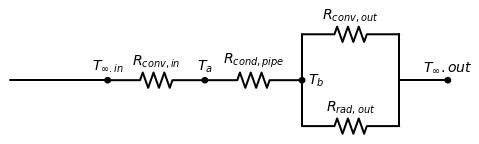

In [11]:
d = schem.Drawing()
L1=d.add( e.LINE, d = 'right')
d.labelI(L1,'q')
d.add( e.DOT, label='$T_{\infty.in}$')
R0 = d.add( e.RES, d='right', label=Rth[0].name )
d.add( e.DOT, label='$T_a$')
R1 = d.add( e.RES, d='right', label=Rth[1].name )
d.add( e.DOT, rgtlabel='$T_b$')
L0 = d.add( e.LINE, d = 'up', l = 1.5)
R2 = d.add( e.RES, d='right', label=Rth[2].name )
L1 = d.add( e.LINE, d = 'down', l = 1.5)
L2 = d.add( e.LINE, d = 'right', l = 1.5)
d.add(e.DOT, label = '$T_\infty.out$')
L3 = d.add( e.LINE, d = 'down', xy = R1.end, l = 1.5)
R3 = d.add( e.RES, d = 'right', label = Rth[3].name)
L4 = d.add( e.LINE, d = 'up', l = 1.5)
d.draw()

For 1D conduction in a solid or a fluid at rest, the expression of the thermal resistance depends upon the geometry of the system:
* **Plane wall** or planar conduction is declared by the function `R[i].cond_plane(k,L)` for calculation of heat flux ($W/m^2$) or `R[i].cond_plane(k,L,A)` for calculation or heat rate ($W$). `k` is the thermal conductivity, `L` the wall thickness and `A` is the cross sectional area of the wall (perpendicular to the flux).
<p class='alert alert-danger'>
$$
R_\text{th,cond}=\frac{L}{kA}
$$
</p>
* **Cylindrical shell**: `R[i].cond_cylinder(k,ra,rb)` or `R[i].cond_cylinder(k,ra,rb,L=Lpipe ,)` or `R[i].cond_cylinder(k,ra,rb,angle)` or `R[i].cond_cylinder(k,ra,rb,L=Lpipe ,angle = angle_pipe)` . The first computes $R'$ for a unit length of the pipe, the second $R$ for the whole pipe, the third $R'$ for a cylindrical shell with a specific angular dimenion (i.e. smaller than $2\pi$) and the fourth is the same as the third but for the whole length of the shell. `ra` and `rb` are the internal and external radii of the shell.
<p class='alert alert-danger'>
$$
R_\text{th,cond}=\cfrac{\ln\left(\cfrac{r_b}{r_a}\right)}{2\pi kL}
$$
</p>
* **Spherical shell**: `R[i].cond_sphere(k,ra,rb)` or `R[i].cond_sphere(k,ra,rb,scale)`. Here scale is a value <= 1., 1. by default for a full spherical shell, less than one for a fraction shell. For instance, a cornea is about 1/3 of spherical shell, therefore scale=1./3.
<p class='alert alert-danger'>
$$
R_\text{th,cond}=\cfrac{\cfrac{1}{r_a}-\cfrac{1}{r_b}}{4\pi k}
$$
</p>

* **Contact resistance**: `R[i].contact(Rc)` or `R[i].contact(Rc,A)`. `A` is optional and `A=1.0` by default when calculating heat flux. `Rc`, the contact resistance is obtained from tables based on the materials involved and their respective roughness.

* **Convection**: `R[i].convection(h)` or `R[i].convection(h)`. `A` is optional and `A=1.0` by default when calculating heat flux. `h` is the convection heat transfer coefficient ($W/(m^2.K)$ obtained from correlations specific to the geometry and flow parameters of the problem.

<p class='alert alert-danger'>
$$
R_\text{th,conv}=\frac{1}{hA}
$$
</p>

* **Radiation**: `R[i].radiation(eps,T_s,T_sur)` and `R[i].radiation(eps,T_s,T_sur,A)`. `A` is optional and `A=1.0` by default when calculating heat flux. `eps` is the permissivity of the material, `T_s` the surface temperature and `T_sur` is the temperature of the distant surface emitting radiation. **Both temperatures must be in Kelvin**. `R[i].h` outputs the radiation heat transfer coefficient $h_r$:

<p class='alert alert-danger'>
$$
R_\text{th,rad}=\frac{1}{h_rA}\, \text{ with } h_r = \varepsilon\sigma(T_s+T_\text{sur})(T_s^2+T_\text{sur}^2)
$$
<b> To calculate $h_r$, temperatures must be in Kelvin</b>
</p>

Like a thermal circuit, $n$ thermal resistances in serial are equivalent to one total resistance. If the $n$ resistances are stored in an array $R[i]$, the total resistance of resistances in series starting at $m$ and finishing at $n$ is 
<FONT FACE="courier" style="color:blue">serial_sum(R,m,n)</FONT>
<p class='alert alert-danger'>
$$
R_\text{th,tot}=\sum_{i=m}^{n}R[i]
$$
</p>
Similarly, thermal resistances in parallel between $n$ and $m$ reduce to
<FONT FACE="courier" style="color:blue">parallel_sum(R,m,n)</FONT>
<p class='alert alert-danger'>
$$
R_\text{th,tot}=\left(\sum_{i=m}^{n}\cfrac{1}{R[i]}\right)^{-1}
$$
</p>


In [51]:
"""Example: heated water at T_infty_in flowing in a pipe with convection heat transfer h_i. The pipe of length L is made of copper, length L,
inner radius r_a, outer radius r_b. The pipe is immersed in air at T_infty_out and the heat transfer from the outer
surface of the pipe to the air is through convection and radiation. Find the heat loss per unit length
"""  
L_pipe = 1. #m
r_a = 0.05/2.  #m
r_b = 0.055/2. #m
h_i = 60. #W/m^2.K
k_pipe = 80. #W/m.K
h_o = 2. #W/m^2.K
eps = 0.8
T_infty_in = 320. #C
T_infty_out = 5. #C
T_sur = T_infty_out #radiation reference temperature
A_i = 2.*np.pi*r_a*L_pipe
A_o = 2.*np.pi*r_b*L_pipe
print(A_i,A_o)

""" By construction, the radiation resistance needs the surface temperature at r=r_b. """
T_b = 310 #C a guess at this poin

Rth = []
Rth.append(res.Resistance("$R'_{conv,in}$","W/m"))
Rth.append(res.Resistance("$R'_{cond,pipe}$","W/m"))
Rth.append(res.Resistance("$R'_{conv,out}$","W/m"))
Rth.append(res.Resistance("$R'_{rad,out}$","W/m"))

d = schem.Drawing()
#L1=d.add( e.LINE, d = 'right')
#d.labelI(L1,'q')
d.add( e.DOT, label='$T_{\infty,in}$')
R0 = d.add( e.RES, d='right', label=Rth[0].name )
d.add( e.DOT, label='$T_a$')
R1 = d.add( e.RES, d='right', label=Rth[1].name )
d.add( e.DOT, rgtlabel='$T_b$')
L0 = d.add( e.LINE, d = 'up', l = 1.5)
R2 = d.add( e.RES, d='right', label=Rth[2].name )
L1 = d.add( e.LINE, d = 'down', l = 1.5)
L2 = d.add( e.LINE, d = 'right', l = 1.5)
d.add(e.DOT, label = '$T_\infty,out$')
L3 = d.add( e.LINE, d = 'down', xy = R1.end, l = 1.5)
R3 = d.add( e.RES, d = 'right', label = Rth[3].name)
L4 = d.add( e.LINE, d = 'up', l = 1.5)
d.draw()

Rth[0].convection(h_i,A_i)
Rth[1].cond_cylinder(k=k_pipe,ra = r_a, rb = r_b, L = L_pipe)
Rth[2].convection(h_o,A_o)
error = np.inf
threshold = 0.001
iteration = 0
while (error > threshold) and (iteration < 10):
    
    Rth[3].radiation(eps,thermo.C2K(T_b),thermo.C2K(T_sur),A_o)
    R_tot = res.serial_sum(Rth,0,1) + res.parallel_sum(Rth,2,3)
    q = R_tot*(T_infty_in - T_infty_out)
    T = np.zeros(4)
    T_b_old = T_b
    T[0] = T_infty_in
    T[1] = T[0] - q*Rth[0].R
    T[2] = T[1] - q*Rth[1].R
    T[3] = T_infty_out
    T_b = T[2]
    print(q)
    error = np.abs(T_b - T_b_old)
    iteration += 1

print("T_b = %.2f C"%T_b)
print("Number of iterations: %2i" %iteration)
print("Heat rate: %.0f W" %q)   


0.15707963267948966 0.17278759594743862
133.05054277632627
134.516288064436
134.57191534774122
134.5740272051045
T_b = 305.70 C
Number of iterations:  4
Heat rate: 135 W
